Per-tract and All-sky healsparse maps
====

Quick example of displaying the depth maps that are made in coadd processing and stored in healsparse format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler

import healsparse as hsp
import skyproj

In [28]:

collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"
b = dafButler.Butler("/repo/embargo", collections=[collection])
                                                   

In [29]:

# This list includes separate datasets for each tract and each filter.
# Treating those all the same for this simple demo.
datasetRefs = b.registry.queryDatasets(datasetType='deepCoadd_psf_maglim_map_weighted_mean')
print(datasetRefs.count())


34


In [30]:
maps = []
for ref in datasetRefs:
    map = b.get(ref)
    maps.append(map)

Per-Tract sample maps
====

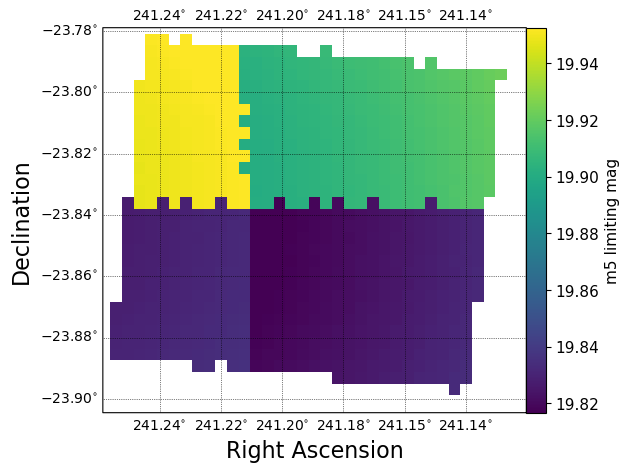

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sp = skyproj.Skyproj(ax=ax)

_ = sp.draw_hspmap(maps[0])
sp.draw_colorbar(label="m5 limiting mag")

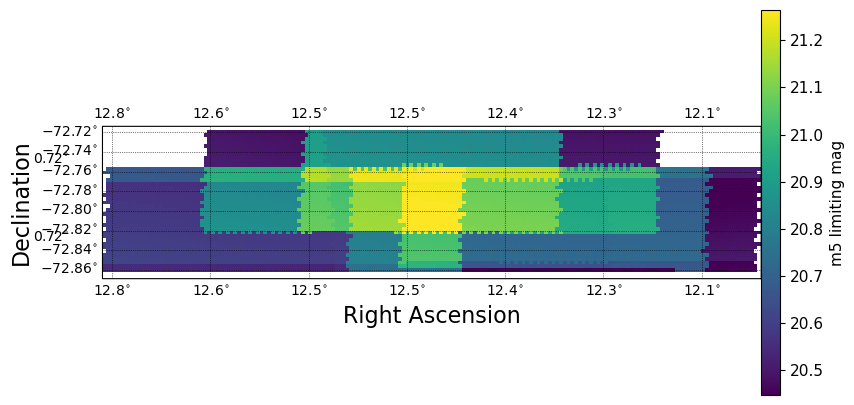

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sp = skyproj.Skyproj(ax=ax)

_ = sp.draw_hspmap(maps[1])
sp.draw_colorbar(label="m5 limiting mag")

Combined Map
====

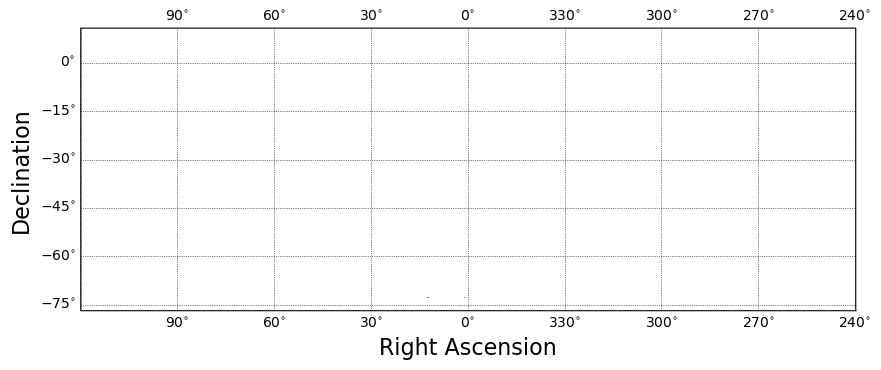

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
sp = skyproj.Skyproj(ax=ax)

# Combine all the maps with a max function (i.e. where two tracts overlap, show the deeper value)
combined_map = hsp.operations.max_union(maps)

_ = sp.draw_hspmap(combined_map)